### 1(a) Tossing a Coin 10,000 Times ###
Heads: 4942, Probability: 0.4942
Tails: 5058, Probability: 0.5058

### 1(b) Rolling Two Dice ###
Number of times sum=7: 1712
Experimental Probability: 0.1712

### 2. Probability of at least one 6 in 10 rolls ###
Estimated Probability: 0.8438

### 3. Conditional Probability and Bayes' Theorem ###
P(Red | Previous Blue) ≈ 0.2506
Theoretical P(Red): 0.2500
Bayes' theorem holds because draws are independent.

### 4. Discrete Random Variable ###
Empirical Mean: 2.1760
Empirical Variance: 0.6170
Empirical Standard Deviation: 0.7855

### 5. Exponential Distribution ###


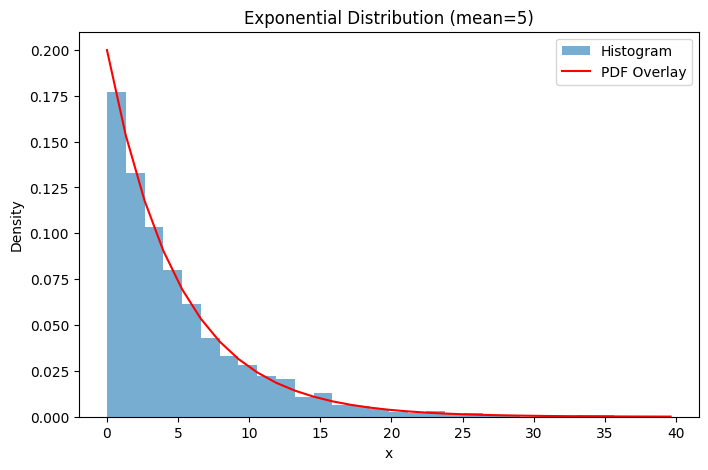

### 6. Central Limit Theorem ###


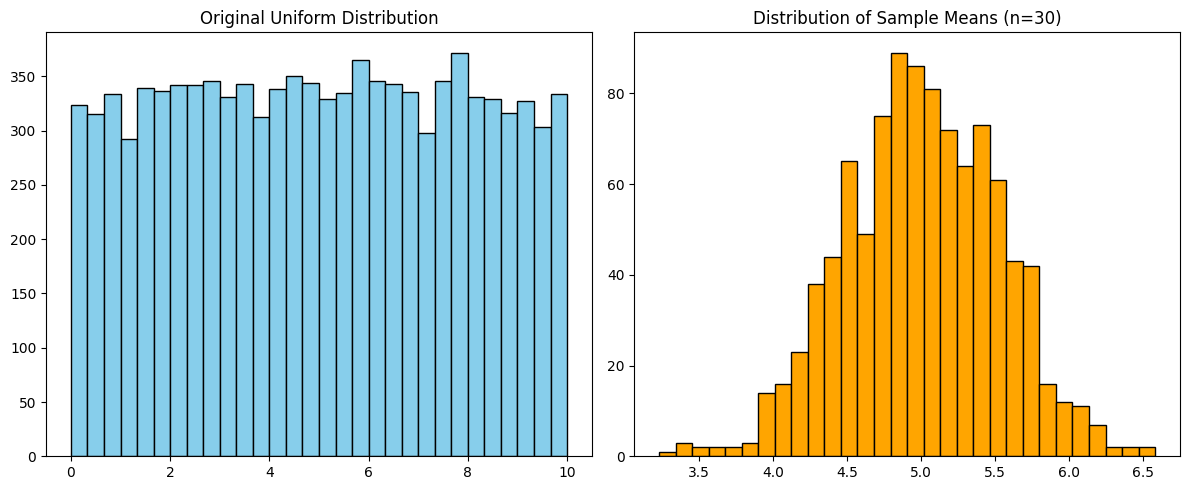

In [ ]:

# BASICS OF PROBABILITY


import random
import numpy as np
import matplotlib.pyplot as plt


# 1(a) Tossing a Coin 10,000 times

print("### 1(a) Tossing a Coin 10,000 Times ###")
trials = 10000
heads = 0
tails = 0

for _ in range(trials):
    toss = random.choice(["H", "T"])
    if toss == "H":
        heads += 1
    else:
        tails += 1

prob_heads = heads / trials
prob_tails = tails / trials

print(f"Heads: {heads}, Probability: {prob_heads:.4f}")
print(f"Tails: {tails}, Probability: {prob_tails:.4f}\n")



# 1(b) Rolling Two Dice & Probability of Sum = 7

print("### 1(b) Rolling Two Dice ###")
trials = 10000
count_sum_7 = 0

for _ in range(trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        count_sum_7 += 1

prob_sum_7 = count_sum_7 / trials
print(f"Number of times sum=7: {count_sum_7}")
print(f"Experimental Probability: {prob_sum_7:.4f}\n")



# 2. Probability of at least one "6" in 10 rolls

print("### 2. Probability of at least one 6 in 10 rolls ###")

def probability_one_six(trials=10000, rolls_per_trial=10):
    success_count = 0
    for _ in range(trials):
        for _ in range(rolls_per_trial):
            if random.randint(1, 6) == 6:
                success_count += 1
                break
    return success_count / trials

prob_at_least_one_six = probability_one_six()
print(f"Estimated Probability: {prob_at_least_one_six:.4f}\n")



# CONDITIONAL PROBABILITY & BAYES' THEOREM


print("### 3. Conditional Probability and Bayes' Theorem ###")
trials = 1000
colors = ["R"] * 5 + ["G"] * 7 + ["B"] * 8  # 5 Red, 7 Green, 8 Blue

previous_ball = None
blue_followed_by_red = 0
blue_total = 0

for _ in range(trials):
    ball = random.choice(colors)
    if previous_ball == "B":
        blue_total += 1
        if ball == "R":
            blue_followed_by_red += 1
    previous_ball = ball

if blue_total > 0:
    cond_prob_red_given_blue = blue_followed_by_red / blue_total
else:
    cond_prob_red_given_blue = 0

print(f"P(Red | Previous Blue) ≈ {cond_prob_red_given_blue:.4f}")

# Theoretical probability (Since independent draws, P(R|B) = P(R))
theoretical_prob_red = 5 / (5 + 7 + 8)
print(f"Theoretical P(Red): {theoretical_prob_red:.4f}")
print("Bayes' theorem holds because draws are independent.\n")


# RANDOM VARIABLES & DISCRETE PROBABILITY


print("### 4. Discrete Random Variable ###")
values = [1, 2, 3]
probs = [0.25, 0.35, 0.4]

sample = np.random.choice(values, size=1000, p=probs)
mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print(f"Empirical Mean: {mean:.4f}")
print(f"Empirical Variance: {variance:.4f}")
print(f"Empirical Standard Deviation: {std_dev:.4f}\n")



# CONTINUOUS RANDOM VARIABLES (EXPONENTIAL)


print("### 5. Exponential Distribution ###")
mean_value = 5
data = np.random.exponential(scale=mean_value, size=2000)

plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6, label="Histogram")

# PDF Overlay
lambda_param = 1 / mean_value
pdf = lambda_param * np.exp(-lambda_param * bins)
plt.plot(bins, pdf, 'r-', label="PDF Overlay")

plt.title("Exponential Distribution (mean=5)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()



# CENTRAL LIMIT THEOREM


print("### 6. Central Limit Theorem ###")
uniform_data = np.random.uniform(0, 10, size=10000)
sample_means = []

for _ in range(1000):
    sample = np.random.choice(uniform_data, size=30)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=30, color='skyblue', edgecolor='black')
plt.title("Original Uniform Distribution")

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Sample Means (n=30)")

plt.tight_layout()
plt.show()


# A
"We virtually toss a fair coin 10,000 times. Each toss randomly gives us either heads or tails. We simply count how many heads and tails we get, then divide by the total tosses to estimate the probability of each outcome."
# Bayes
"We virtually toss a fair coin 10,000 times. Each toss randomly gives us either heads or tails. We simply count how many heads and tails we get, then divide by the total tosses to estimate the probability of each outcome."
# CLT
We start with 10,000 numbers chosen randomly from a uniform distribution. Then we repeatedly take groups of 30 numbers, find their average, and collect all those averages. When we plot them, the shape of the distribution of these averages looks more and more like a bell curve, which is exactly what the Central Limit Theorem predicts."